### ST1 Capstone Project / Dataset number 5

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
%cd /content/drive/MyDrive/Colab Notebooks/ST1

/content/drive/MyDrive/Colab Notebooks/ST1


In [85]:
!ls

clothes_price_prediction_data.csv  DataForML.pkl  Final_XGB_Model.pkl


This project will be based on the dataset from kaggle repository which includes about the clothing prices from different brands, clothing types and prices.

### STEP 1: Reading the Data description.

In [86]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')
# Reading the dataset
import pandas as pd
import numpy as np
ClothingData=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ST1/clothes_price_prediction_data.csv', encoding='latin')
print('Shape before deleting duplicate values:', ClothingData.shape)


Shape before deleting duplicate values: (1000, 6)


In [87]:
# Removing duplicate rows if any
ClothingData=ClothingData.drop_duplicates()
print('Shape After deleting duplicate values:', ClothingData.shape)
# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
ClothingData.head(10)

Shape After deleting duplicate values: (1000, 6)


,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113
5,Reebok,Jacket,Red,XL,Nylon,19
6,Puma,Jacket,Red,XXL,Polyester,31
7,Adidas,Dress,Red,XS,Denim,46
8,Reebok,Dress,Black,S,Wool,97
9,Adidas,Jeans,Yellow,L,Wool,80


### Key Observations from Step 1


*   There are 1000 products in the dataset including different clothes with different sizes, colors, pricepoints and materials

*   There are 6 attributes in the file. Those are as follows

  - Brand (Manufacturing brand of the clothes)
  - Category (Category of the clothes e.g Pants, dress, jacket etc)
  - Color (Color of the clothes e.g Blue , white, red , yellow etc)
  - Size (Size of the clothes e.g XS, XL , L , M etc)
  - Material (Manufacturing material of the clothes e.g Denim, Polyester , Wool etc)
  - Price (Selling price of the clothes)





### STEP 2: Problem Statement Definition

- Creating a price prediction model to predict the price of the clothes according to the category, color and other variebles

- Target Variebles : Price Predictors , Features: Brand,
Color, size, category, material,

### STEP 3: Choosing the appropirate ML/AI Algorithm for DATA Analysis

- Based on the problem statement definition, we need to create a ML regression model, as the target varieble is continuous
- Since all the features are in strings we will be assigning nominal value to the each unique strings from the feature categories

In [88]:
# prompt: use label encoder and assign nominal value to the category brand

from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()
# Transform the brand column using the encoder
ClothingData['Brand'] = le.fit_transform(ClothingData['Brand'])
ClothingData['Category'] = le.fit_transform(ClothingData['Category'])
ClothingData['Size'] = le.fit_transform(ClothingData['Size'])
ClothingData['Color'] = le.fit_transform(ClothingData['Color'])
ClothingData['Material'] = le.fit_transform(ClothingData['Material'])
# Print the encoded brand column
print(ClothingData['Brand'])
print(ClothingData['Category'])
print(ClothingData['Color'])
print(ClothingData['Size'])
print(ClothingData['Material'])


0      1
1      1
2      5
3      2
4      0
      ..
995    3
996    3
997    4
998    5
999    1
Name: Brand, Length: 1000, dtype: int64
0      0
1      2
2      0
3      3
4      4
      ..
995    2
996    1
997    4
998    4
999    1
Name: Category, Length: 1000, dtype: int64
0      4
1      0
2      3
3      2
4      4
      ..
995    0
996    3
997    1
998    0
999    5
Name: Color, Length: 1000, dtype: int64
0      4
1      4
2      1
3      1
4      1
      ..
995    0
996    5
997    4
998    5
999    4
Name: Size, Length: 1000, dtype: int64
0      2
1      4
2      5
3      0
4      2
      ..
995    3
996    4
997    1
998    1
999    5
Name: Material, Length: 1000, dtype: int64


# STEP 4: Observing the class distribution of the target variable.

<Axes: >

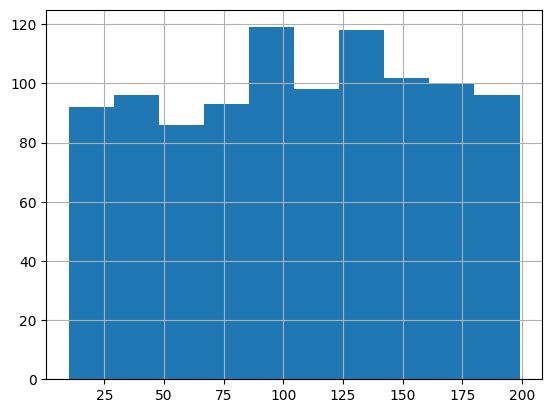

In [89]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the Price values
ClothingData['Price'].hist()

###Observation from STEP 4

- From the observation, we can conclude that the data of the target variable is not skewed.

- The data distribution is satisfactory and there are sufficient numbers of rows for each type of values to learn from .

#STEP 5: Basic Explanatory Data Analaysis (EDA)

- This step is performed to guage the overall data.

- The volume of data, the types of columns present in the data.

- Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

- This step helps to start the column/data rejection process.
You must look at each column carefully and ask, does this column affect the values of the Target variable/Class?

- There are four commands which are used for Basic data exploratory Analysis in Python

    i. head() : This helps to see a few sample rows of the data

    ii. info() : This provides the summarized information of the data

    iii. describe() : This provides the descriptive statistical details of the data

    iv. nunique(): This helps us to identify if a column is categorical or continuous

In [90]:
#Looking at sample rows in the data
ClothingData.head()

,Brand,Category,Color,Size,Material,Price
0,1,0,4,4,2,182
1,1,2,0,4,4,57
2,5,0,3,1,5,127
3,2,3,2,1,0,77
4,0,4,4,1,2,113


In [91]:
# Looking at sample rows in the data
ClothingData.tail()

,Brand,Category,Color,Size,Material,Price
995,3,2,0,0,3,176
996,3,1,3,5,4,110
997,4,4,1,4,1,127
998,5,4,0,5,1,69
999,1,1,5,4,5,174


In [92]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
ClothingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Brand     1000 non-null   int64
 1   Category  1000 non-null   int64
 2   Color     1000 non-null   int64
 3   Size      1000 non-null   int64
 4   Material  1000 non-null   int64
 5   Price     1000 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


In [93]:
# Looking at the descriptive statistics of the data
ClothingData.describe(include='all')

,Brand,Category,Color,Size,Material,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,2.525000,2.401000,2.540000,2.639000,2.55000,106.289000
std,1.722307,1.674815,1.713282,1.680328,1.71068,53.695444
min,0.000000,0.000000,0.000000,0.000000,0.00000,10.000000
25%,1.000000,1.000000,1.000000,1.000000,1.00000,59.750000
50%,3.000000,2.000000,3.000000,3.000000,3.00000,108.000000
75%,4.000000,4.000000,4.000000,4.000000,4.00000,150.000000
max,5.000000,5.000000,5.000000,5.000000,5.00000,199.000000


In [94]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuou
ClothingData.nunique()

Brand         6
Category      6
Color         6
Size          6
Material      6
Price       190
dtype: int64

###Observation from STEP 5

- Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each
column.

- Hence, creating a initial roadmap for further analysis.

- The selected columns in this step are not nal, further study will be done and then a nal list will be created

    i. Brand - Categorical, Selected

    ii. Category - Categorical, Selected

    iii. Size - Categorical, Selected

    iv. Color - Categorical, Selected

    v. Material - Categorical, Selected

    vi. Price - Continuous, Selected


#STEP 6 : Removing unwanted columns

- Since all the qualitative datas are converted are assigned with nominal values , there is no need to remove any columns

# STEP 7 : Basic Visual Expalanatory Data Analaysis

- Visualize distribution of all the Categorical Predictor variables in the data using bar plots

- We can spot a categorical variable in the data by looking at the unique values in them.

- Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be
grouped by those unique values.

- Based on the Basic Exploration Data Analysis in the previous step, we could spotted five categorical predictors in the data.

 i. Brand

 ii. Category

 iii. Color

 iv. Size

 v. Material

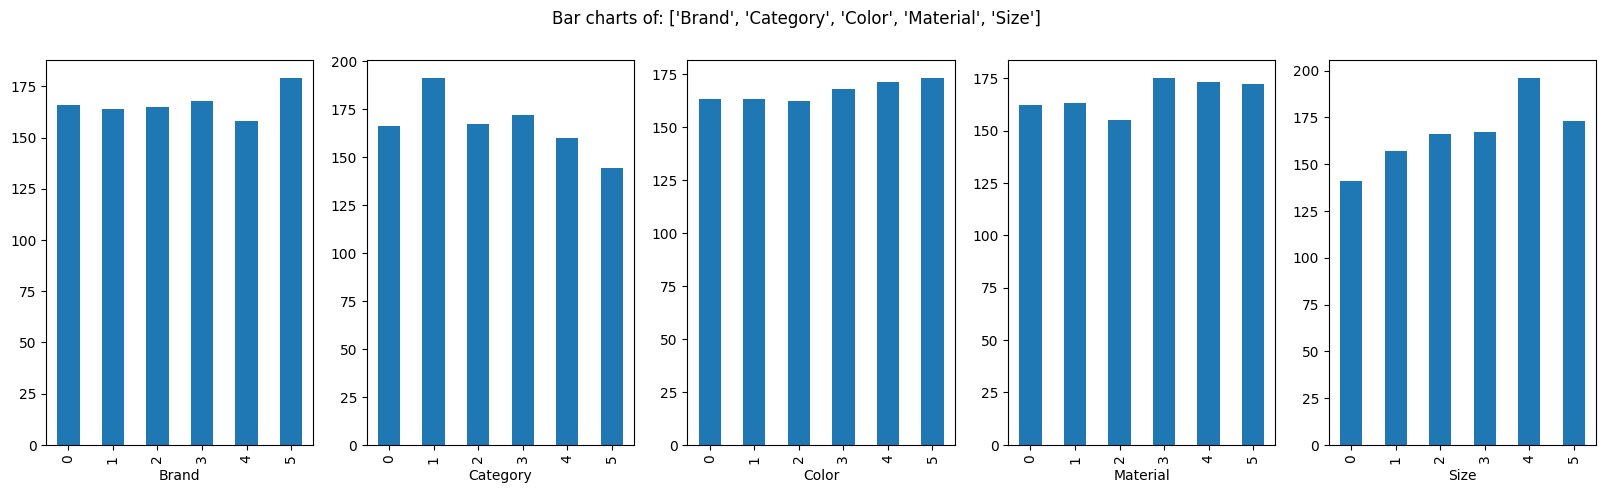

In [95]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])
#####################################################################
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=ClothingData, colsToPlot=['Brand','Category','Color','Material','Size'])


###Observations from Visual EDA

- Each category has comparable frequency, hence all the categorical predictors are used for the further analysis


#Step 8: Visualizing the distributions of all continous predictor variables in the data using histograms

- Based on Basic EDA, Price is the only continous variable. So we will be visualizing the distribution of the variable using histogram.

<Axes: >

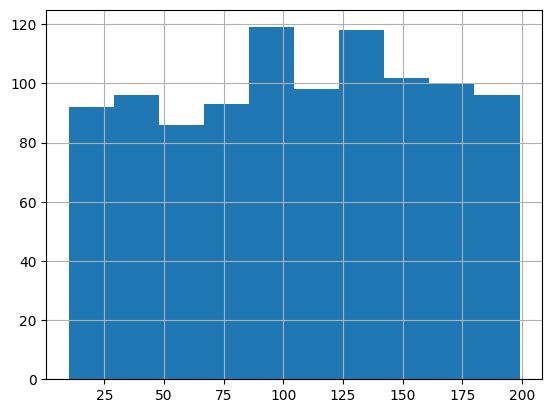

In [96]:
ClothingData['Price'].hist()


###Observation from step 8
- The overall distribution seems good.

#Step 9: Outlier Analysis

Since the distribution for all the data seems uniform. There is no neeed for outlier analysis

###Step 10: Finding Missing Value

In [97]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
ClothingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Brand     1000 non-null   int64
 1   Category  1000 non-null   int64
 2   Color     1000 non-null   int64
 3   Size      1000 non-null   int64
 4   Material  1000 non-null   int64
 5   Price     1000 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


###Observations from Step 10
- Since there is no missing values. We are not required to find any missing values.


#Step 11: Feature selection (Attribute Selection)

- We will be using ANOVA tests and box plots to further test the correlation between the categorical features and target variable which is continuous.

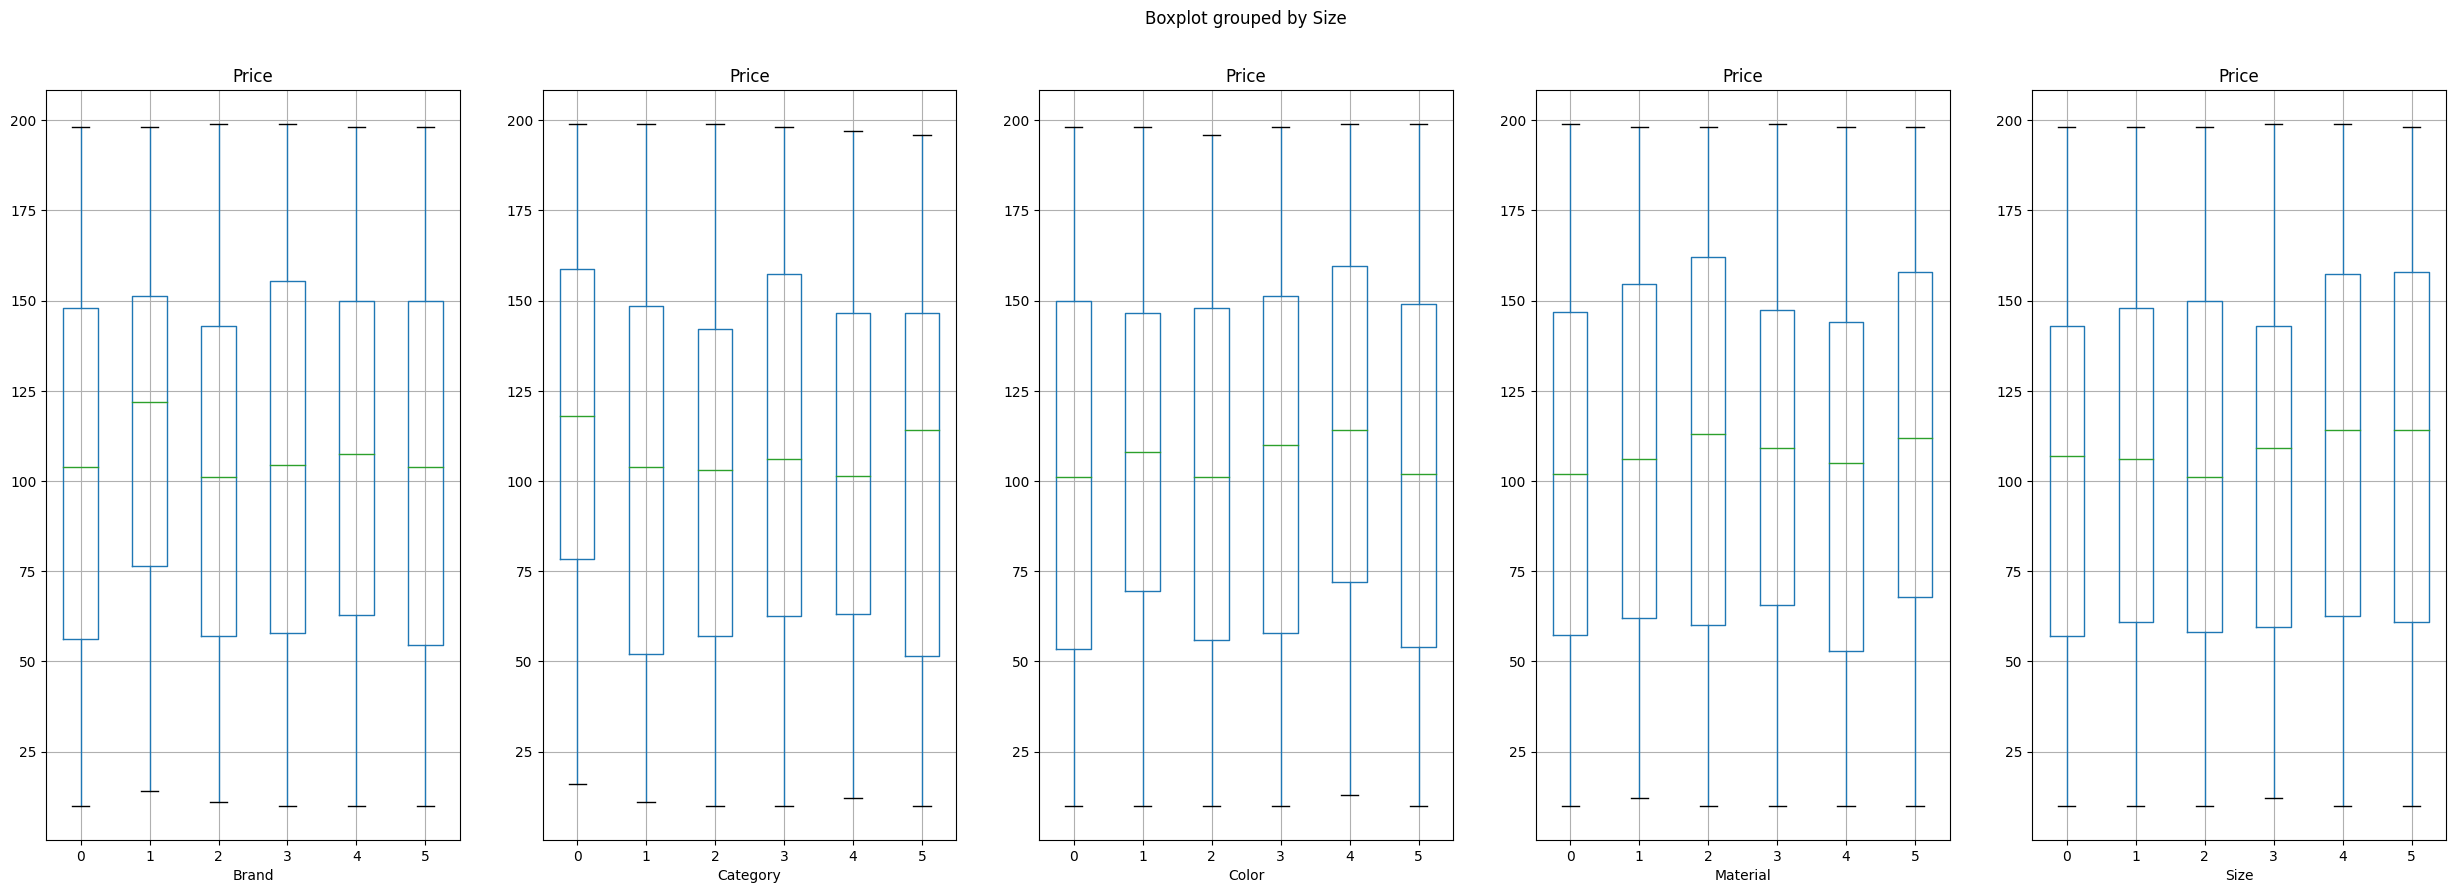

In [98]:
# Box plots for continuous Target Variable "MEDV" and Categorical predictors
CategoricalColsList=['Brand','Category','Color','Material','Size']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(30,10))
# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    ClothingData.boxplot(column='Price', by=PredictorCol, figsize=(30,30), vert=True, ax=PlotCanvas[i])

###Observation from Step 10
- All the categorical features seems to have comparable frequence, hence we will be using all the features for ANOVA test.

###Statistical feature selection using Anova test

- We will be treating all the categorical datas with ANOVA tests to further analyse the correlation with target variable.


In [99]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.4):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Brand','Category','Color','Material','Size']
FunctionAnova(inpData=ClothingData,
              TargetVariable='Price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Brand is correlated with Price | P-Value: 0.2601099878167752
Category is correlated with Price | P-Value: 0.22576473150531826
Color is NOT correlated with Price | P-Value: 0.4617893742587683
Material is NOT correlated with Price | P-Value: 0.7365826899195708
Size is NOT correlated with Price | P-Value: 0.7098835429591747


['Brand', 'Category']

###Observation from Anova test

- From the test, we can see that only Brand and Category is corelated with the target variable.

#Selecting Final predictor features for ML/AI training module

- Based on exclusive EDA, tests and features selection process. The final predictors and features for ML model will be

i. 'Brand'

ii. 'Category'

iii. 'Price'

In [100]:
SelectedColumns=['Brand','Category','Price']
# Selecting final columns
DataForML=ClothingData[SelectedColumns]
DataForML.head()

,Brand,Category,Price
0,1,0,182
1,1,2,57
2,5,0,127
3,2,3,77
4,0,4,113


#Step 13: Pre-processing the datas for ML model building and model development

- We will be processing all the categorical features, assigning them with new nominal values and saving them in pickle file for model deployment at the end

In [101]:
import pickle
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [102]:
# prompt: treat all the nominal variables into numeric ones but do not use boolean.
#  Add target variable price to the data subset

import pandas as pd

# Load the data subset
DataForML = pd.read_pickle('DataForML.pkl')

# Identify nominal variables
nominal_variables = ['Brand', 'Category',]

# Create a dictionary to map nominal values to numeric ones
numeric_mapping = {}

# Iterate over nominal variables and create mappings
for variable in nominal_variables:
    unique_values = DataForML[variable].unique()
    numeric_mapping[variable] = {value: i for i, value in enumerate(unique_values)}

# Apply the mappings to the data subset
for variable, mapping in numeric_mapping.items():
    DataForML[variable] = DataForML[variable].map(mapping)

# Add target variable price to the data subset
DataForML['Price'] = ClothingData['Price']

# Print the transformed data subset
print(DataForML.head())


   Brand  Category  Price
0      0         0    182
1      0         1     57
2      1         0    127
3      2         2     77
4      3         3    113


#Step 14: Machine Learning Model Development

- We will be seperating the selected attributes into train and test samples.


In [103]:
# Printing all the column names for our reference
DataForML.columns

Index(['Brand', 'Category', 'Price'], dtype='object')

In [104]:
#Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Brand', 'Category']
X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

#Step 15: Standarization/ Normalization of the Data

In [105]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results
# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 2)
(700,)
(300, 2)
(300,)


#Step 16: Multiple Linear Regression Algorithm For ML/AI model building

In [106]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.0011207448627990058

##### Model Validation and Accuracy Calculations ##########
   Brand  Category  Price  PredictedPrice
0    0.2       0.0    101           110.0
1    0.0       0.0    164           111.0
2    0.8       0.8     58           105.0
3    0.4       1.0     82           105.0
4    0.0       1.0    177           106.0
Mean Accuracy on test data: -0.7819439504017538
Median Accuracy on test data: 63.716583124477864

Accuracy values for 10-fold Cross Validation:
 [ 16.21034628 -16.08498607 -19.99684909  12.95109355   3.88698191
  23.50841419  44.37821175  -0.19163716 -10.49262893   3.7845942 ]

Final Average Accuracy of the model: 5.8


#Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.0372594866352528

##### Model Validation and Accuracy Calculations ##########
   Brand  Category  Price  PredictedPrice
0    0.2       0.0    101           140.0
1    0.0       0.0    164           120.0
2    0.8       0.8     58           112.0
3    0.4       1.0     82           100.0
4    0.0       1.0    177           110.0
Mean Accuracy on test data: -2.9022022311379345
Median Accuracy on test data: 63.63636363636363

Accuracy values for 10-fold Cross Validation:
 [ 14.09278073 -15.26637227 -17.44404376  12.43316686   5.00545237
  22.56471817  43.18740058   4.93567775  -8.02919131   4.52017983]

Final Average Accuracy of the model: 6.6


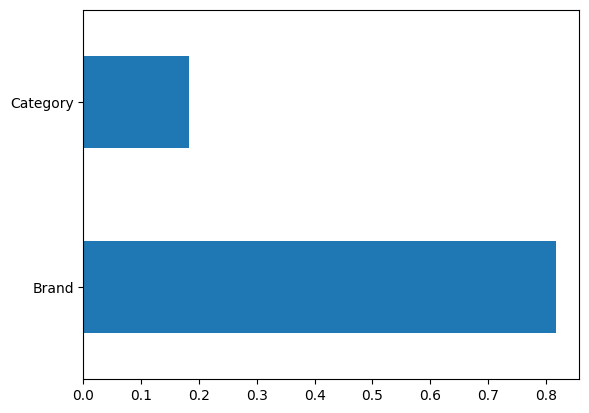

In [107]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


#Ploting/ Visualizing Decision Tree

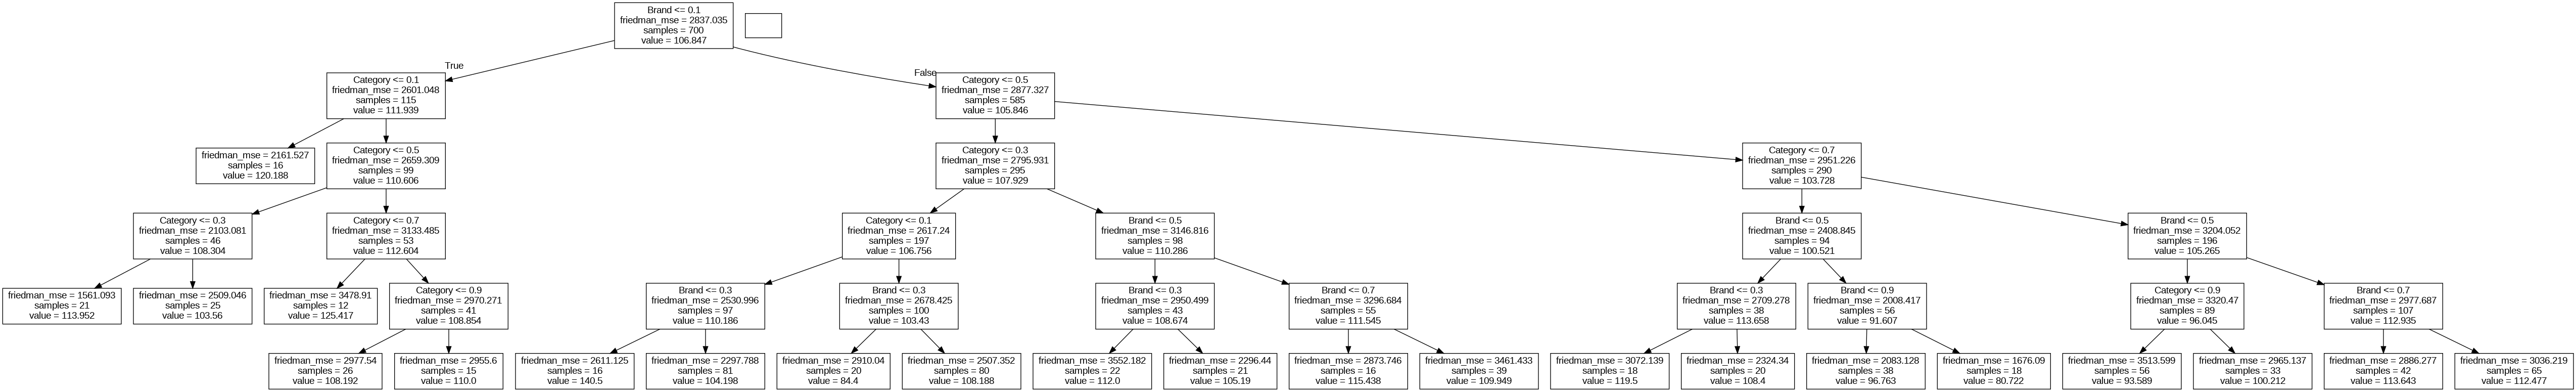

In [108]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

#Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.038905995533349946

##### Model Validation and Accuracy Calculations ##########
   Brand  Category  Price  PredictedPrice
0    0.2       0.0    101           127.0
1    0.0       0.0    164           121.0
2    0.8       0.8     58           111.0
3    0.4       1.0     82            97.0
4    0.0       1.0    177           111.0
Mean Accuracy on test data: -2.8066889811310034
Median Accuracy on test data: 64.92424242424242

Accuracy values for 10-fold Cross Validation:
 [ 14.58237015 -15.06941728 -17.3610539   13.78035362   4.28030187
  23.57045567  43.55269326   2.52951201  -7.08493042   4.19201828]

Final Average Accuracy of the model: 6.7


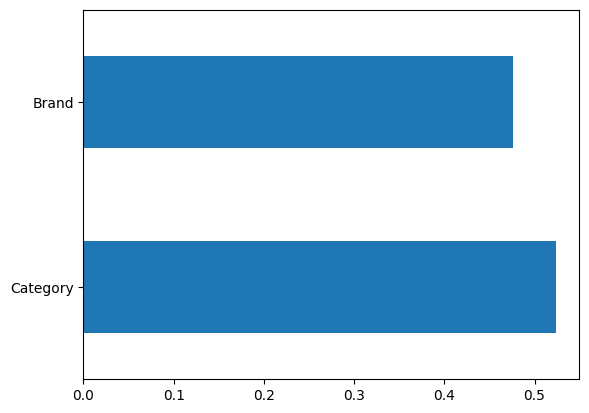

In [109]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')


###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Ploting one of the Decision Tree in Random Forest Regressor

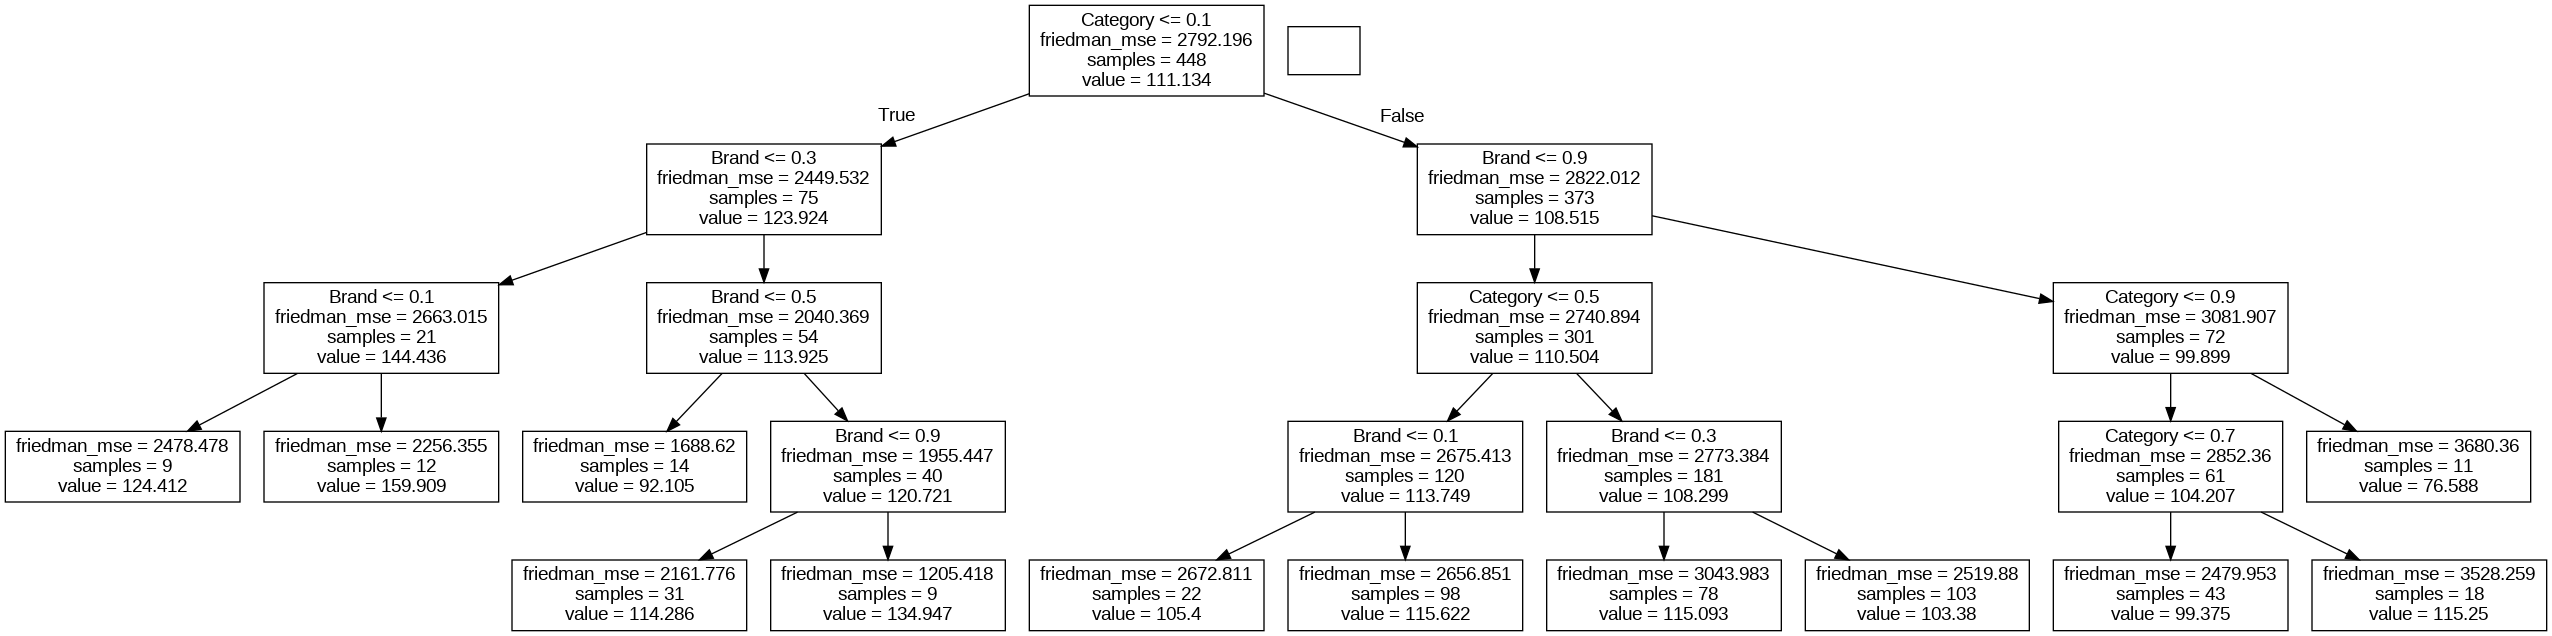

In [110]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in


#AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.018481449191294574

##### Model Validation and Accuracy Calculations ##########
   Brand  Category  Price  PredictedPrice
0    0.2       0.0    101           121.0
1    0.0       0.0    164           119.0
2    0.8       0.8     58           108.0
3    0.4       1.0     82           101.0
4    0.0       1.0    177           109.0
Mean Accuracy on test data: -0.959382494356646
Median Accuracy on test data: 63.63636363636363

Accuracy values for 10-fold Cross Validation:
 [ 14.81579071 -14.26366562 -17.97202163  13.86639598   4.11122723
  24.13256482  43.77682934   2.01112451  -7.27057797   3.57824324]

Final Average Accuracy of the model: 6.68


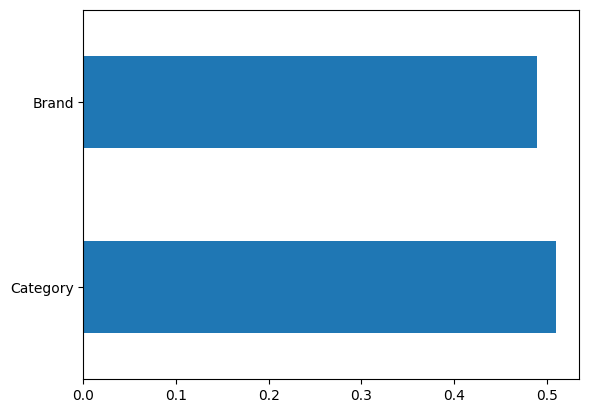

In [111]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.051271237391571245

##### Model Validation and Accuracy Calculations ##########
   Brand  Category  Price  PredictedPrice
0    0.2       0.0    101           135.0
1    0.0       0.0    164           123.0
2    0.8       0.8     58     

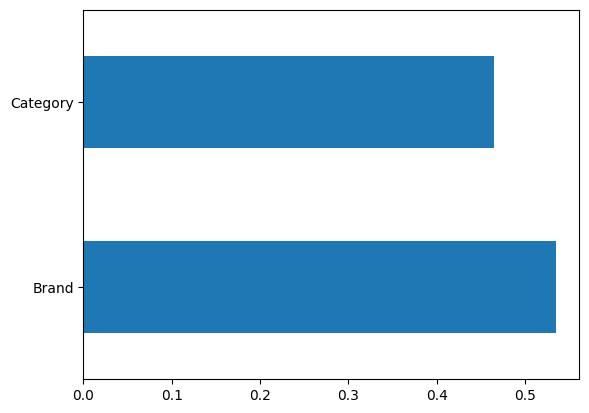

In [112]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



#Plotting a single Decision tree out of XGBoost


<Axes: >

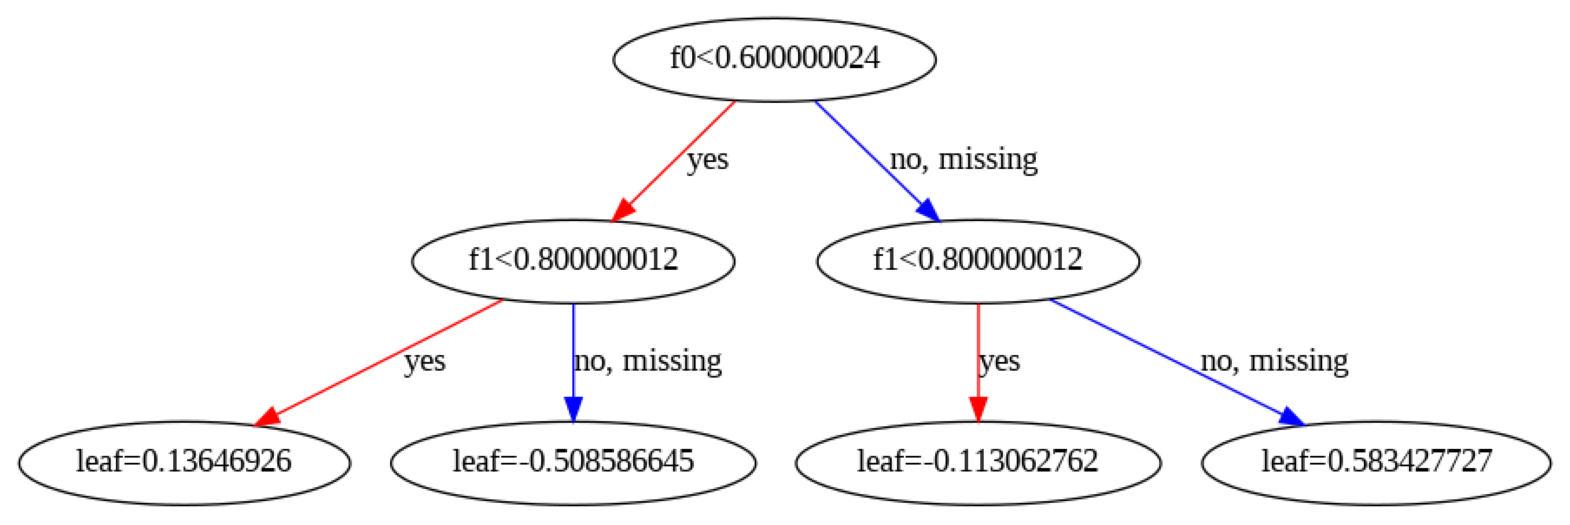

In [113]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)




#K-Nearest Neighbor(KNN)

In [114]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: -0.23338869228897252

##### Model Validation and Accuracy Calculations ##########
   Brand  Category  Price  PredictedPrice
0    0.2       0.0    101           148.0
1    0.0       0.0    164           146.0
2    0.8       0.8     58            71.0
3    0.4       1.0     82           100.0
4    0.0       1.0    177           142.0
Mean Accuracy on test data: -10.290529662667097
Median Accuracy on test data: 63.47212950600802

Accuracy values for 10-fold Cross Validation:
 [  9.88924011 -21.71522929 -18.1836106    8.34868368  13.58253112
  30.50948647  35.7933158    4.93985983 -16.024949     5.65317184]

Final Average Accuracy of the model: 5.28


#Support Vector Machine (SVM) Regressor

In [115]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.0005286743969550312

##### Model Validation and Accuracy Calculations ##########
   Brand  Category  Price  PredictedPrice
0    0.2       0.0    101           108.0
1    0.0       0.0    164           109.0
2    0.8       0.8     58           105.0
3    0.4       1.0     82           107.0
4    0.0       1.0    177           108.0
Mean Accuracy on test data: -0.5217024083582942
Median Accuracy on test data: 63.883540151190985

Accuracy values for 10-fold Cross Validation:
 [ 14.20383882 -17.22018238 -22.21971234  10.28232983   2.63031963
  21.89278297  44.05845933  -0.31409646 -12.58705995   1.27225988]

Final Average Accuracy of the model: 4.2


#Model Deployment

In [116]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Brand', 'Category', ]

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


#Cross Validating the final accuracy with less predictors

In [117]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [ 15.15865224 -15.64408162 -16.33000499  13.27756293   4.90802684
  23.10107944  43.36331191   3.55784663  -6.64379364   5.78312578]

Final Average Accuracy of the model: 7.05


#Retraining the final model using 100% of data

In [118]:
 #Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

# Save the model as the serialized file which can be stored anywhere

In [119]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/Colab Notebooks/ST1


#Creating a python function

In [120]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['Brand','Category']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

#Python

In [121]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

class ClothesPricePredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Clothes Price Prediction')
        self.data = pd.read_pickle(r'DataForML.pkl')
        self.sliders = []

        self.X = self.data.drop('Price', axis=1).values
        self.y = self.data['Price'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        self.model = XGBRegressor()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()

    def create_widgets(self):
        for i, column in enumerate(self.data.columns[:-1]):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            current_val_label = tk.Label(self.master, text='0.0')
            current_val_label.grid(row=i, column=2)
            slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                               command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
            slider.grid(row=i, column=1)
            self.sliders.append((slider, current_val_label))

        predict_button = tk.Button(self.master, text='Predict Price', command=self.predict_price)
        predict_button.grid(row=len(self.data.columns[:-1]), columnspan=3)

    def predict_price(self):
        inputs = [float(slider.get()) for slider, _ in self.sliders]
        price = self.model.predict([inputs])
        messagebox.showinfo('Predicted Price', f'The predicted clothe price is ${price[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = ClothesPricePredictionApp(root)
    root.mainloop()


TclError: no display name and no $DISPLAY environment variable